# Inspection

We inspect some properties or relations between variables using these functions

## Partial Dependence

Partial dependence of a feature (or a set of features) corresponds to the average response of an estimator for each possible value of the feature.

In [1]:
X = [[0, 0, 2], [1, 0, 0]]
y = [0, 1]
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import partial_dependence
gb = GradientBoostingClassifier(random_state=0).fit(X, y)
partial_dependence(gb, features=[0], X=X, percentiles=(0, 1), grid_resolution=2) 

{'average': array([[-5.39711187,  5.39711187]]), 'values': [array([0., 1.])]}

## Permutation Importance

Permutation importance for feature evaluation

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
X = [[1, 9, 9],[1, 9, 9],[1, 9, 9],
    [0, 9, 9],[0, 9, 9],[0, 9, 9]]
y = [1, 1, 1, 0, 0, 0]
clf = LogisticRegression().fit(X, y)
result = permutation_importance(clf, X, y, n_repeats=10,
random_state=0)
result.importances_mean

array([0.46666667, 0.        , 0.        ])

In [3]:
result.importances_std

array([0.22110832, 0.        , 0.        ])

## Decision Boundary Display

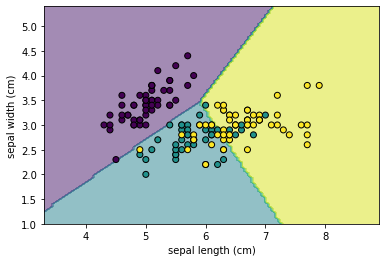

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

iris = load_iris()
X = iris.data[:, :2]
classifier = LogisticRegression().fit(X, iris.target)
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X, response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.show()

## Partial Dependence Display

Partial Dependence Plot (PDP).

This can also display individual partial dependencies which are often referred to as: Individual Condition Expectation (ICE).

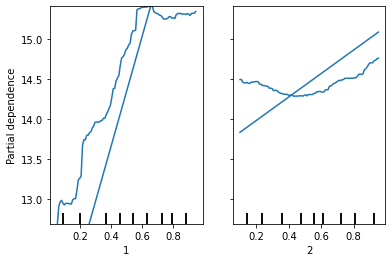

In [5]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.datasets import make_friedman1
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
X, y = make_friedman1()
est1 = LinearRegression().fit(X, y)
est2 = RandomForestRegressor().fit(X, y)
disp1 = PartialDependenceDisplay.from_estimator(est1, X,
                                                [1, 2])
disp2 = PartialDependenceDisplay.from_estimator(est2, X, [1, 2],
                                                ax=disp1.axes_)

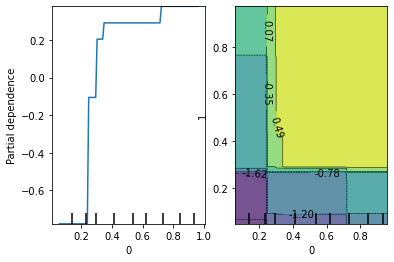

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
X, y = make_friedman1()
clf = GradientBoostingRegressor(n_estimators=10).fit(X, y)
PartialDependenceDisplay.from_estimator(clf, X, [0, (0, 1)])
plt.show()